# Principal Components Analysis
Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis. 
- It aims to transform a high-dimensional dataset into a lower-dimensional representation while retaining most of the relevant information.

Supose we have a collections of students and its grades in the English course. Grades from 0 to 10

In [22]:
import numpy as np
import pandas as pd

grades = pd.DataFrame({"english": [8.0, 7.1, 10.0, 3.8, 1.4, 2.3]})
grades

,english
0,8.0
1,7.1
2,10.0
3,3.8
4,1.4
5,2.3


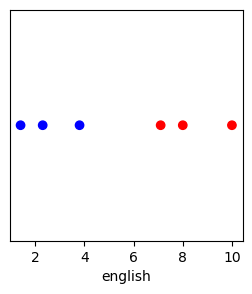

In [39]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(figsize=(3,3))
ax.scatter(grades.english, np.full(len(grades), 2), c=[*'rrrbbb'])
plt.xlabel('english')
plt.yticks([])
plt.show()

It is evident that there are two distinct groups of students. The distances between students 1, 2, and 3 are more similar to each other compared to students 4, 5, and 6.

Lets add now a second course.

In [24]:
grades['math'] = [7, 6.5, 6.1, 4, 3.7, 2]
grades

,english,math
0,8.0,7.0
1,7.1,6.5
2,10.0,6.1
3,3.8,4.0
4,1.4,3.7
5,2.3,2.0


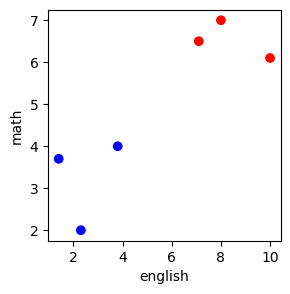

In [40]:
_, ax = plt.subplots(figsize=(3,3))
ax.scatter(grades.english, grades.math, c=[*'rrrbbb'])
plt.xlabel('english')
plt.ylabel('math')   
plt.show()

We can observe that the objects remain clustered together when considering the two dimensions. Specifically, objects 1, 2, and 3 exhibit a high degree of similarity among themselves, while objects 4, 5, and 6 also demonstrate strong similarity within their group.

Now, lets add a third course.

In [41]:
grades['history'] = [10, 9.2, 8.7, 6.4, 6.0, 5.8]
grades

,english,math,history
0,8.0,7.0,10.0
1,7.1,6.5,9.2
2,10.0,6.1,8.7
3,3.8,4.0,6.4
4,1.4,3.7,6.0
5,2.3,2.0,5.8


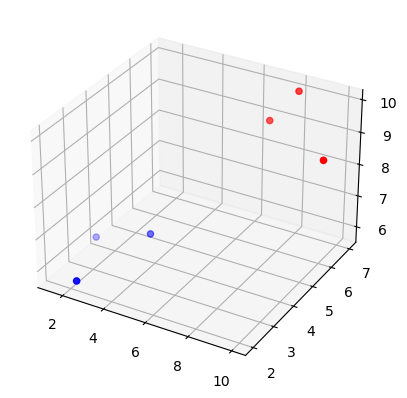

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
ax.scatter(grades.english, grades.math, grades.history, c=[*'rrrbbb'])
plt.show()

As you can see, the same objects keep clustered together.

Lets add a new course.

In [45]:
grades['chemistry'] = [9.3, 8.4, 7.9, 4.3, 4.2, 3.9]
grades

,english,math,history,chemistry
0,8.0,7.0,10.0,9.3
1,7.1,6.5,9.2,8.4
2,10.0,6.1,8.7,7.9
3,3.8,4.0,6.4,4.3
4,1.4,3.7,6.0,4.2
5,2.3,2.0,5.8,3.9


Now we are no longer able to represent data in a plot, because we cannot see a 4D space.

Principal Components Analysis, or PCA, allows to represent a dataset with many dimensions into a new dataset with reduced number of dimensions, but keeping the most important information.
- The principal components represent new orthogonal axes that capture the maximum variance in the data.
- The main principal component is the line which, when all points are projected over it, their spread is the largest.

In this example, it allows to represent the 4D information of grades into a 2D representation, which we can plot and understand.

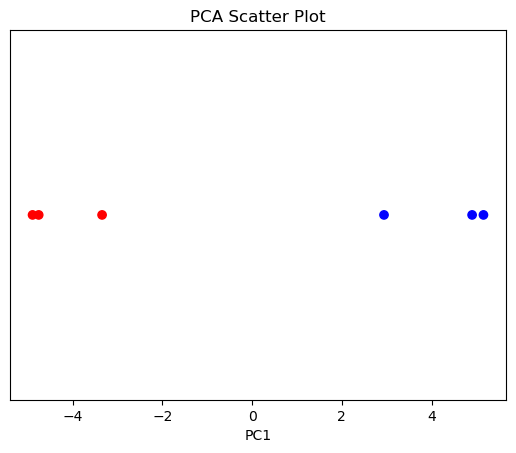

In [51]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=1)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1'])

# Plot the data in a 2D scatter plot
plt.scatter(principal_df['PC1'], np.full(len(grades), 2), c=[*'rrrbbb'])
plt.xlabel('PC1')
plt.yticks([])
plt.title('PCA Scatter Plot')
plt.show()

In [55]:
# Access eigenvalues and eigenvectors
print(pca.explained_variance_)
pca.components_

[23.4121696]


array([[-0.68854493, -0.38291451, -0.36723085, -0.49439242]])

In [59]:
grades.var()

english      11.794667
math          3.813667
history       3.345667
chemistry     6.026667
dtype: float64

In [60]:
grades.var().sum()

24.980666666666664

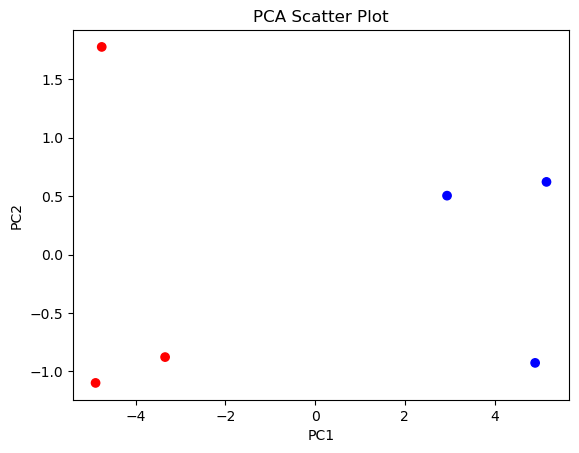

In [57]:
# Perform PCA
pca = PCA(n_components=2)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Plot the data in a 2D scatter plot
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=[*'rrrbbb'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

In [58]:
# Access eigenvalues and eigenvectors
print(pca.explained_variance_)
pca.components_

[23.4121696   1.32597165]


array([[-0.68854493, -0.38291451, -0.36723085, -0.49439242],
       [ 0.7238139 , -0.41055237, -0.35078743, -0.42952109]])

In [62]:
grades.var().sum()

24.980666666666664

In [63]:
# Perform PCA
pca = PCA(n_components=3)  # Select the number of components you want to keep
principal_components = pca.fit_transform(grades)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

print(pca.explained_variance_)
pca.components_

[23.4121696   1.32597165  0.23136199]


array([[-0.68854493, -0.38291451, -0.36723085, -0.49439242],
       [ 0.7238139 , -0.41055237, -0.35078743, -0.42952109],
       [-0.0419324 , -0.82466272,  0.2769472 ,  0.49139934]])

For showing PCA in a real live example, we will use the digit image dataset that we used before. Now we represent each image as a continuous collection of values.

In [64]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

(60000, 28, 28)

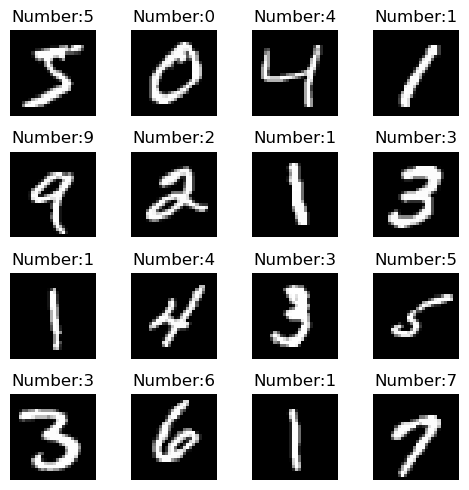

In [68]:
from IPython.display import display
import matplotlib.pyplot as plt


# Calculate the number of rows and columns for the grid
n_rows = 4
n_cols = 4

# Create a new figure with the desired grid size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 5))

# Iterate over the image files and display them in the grid
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Number:{y_train[i]}")
    ax.axis('off')

# Adjust the spacing and layout
plt.tight_layout()

# Display the figure
plt.show()

In [66]:
data = pd.DataFrame(x_train.reshape((-1, 28*28)))
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Perform PCA
pca = PCA(n_components=2)  # Select the number of components you want to keep
principal_components = pca.fit_transform(data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

In [73]:
total_variance = data.var().sum()
print("Total variance", total_variance)
print("Explained variance per PC:", pca.explained_variance_)
print("- relative:", pca.explained_variance_ / total_variance * 100)

Total variance 3428502.574780269
Explained variance per PC: [332724.66744122 243283.93875717]
- relative: [9.70466436 7.09592405]


Remember, there are 784 features!!!

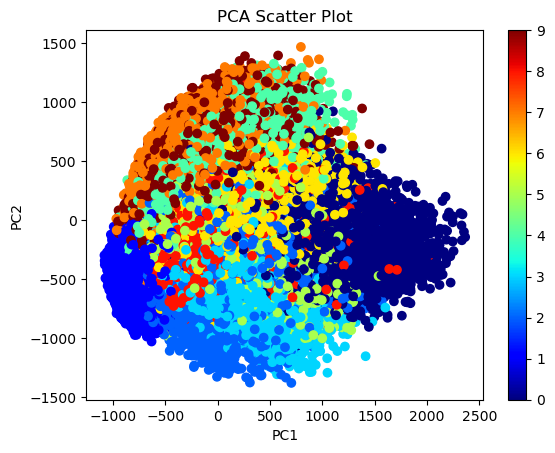

In [77]:
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=y_train, cmap="jet")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.colorbar()
plt.show()

In [87]:
together = principal_df.copy()
together['digit'] = y_train

def plot_digits(digits):
    to_show = together[together.digit.isin(digits)]
    plt.scatter(to_show.PC1, to_show.PC2, c=to_show.digit, cmap="jet")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scatter Plot')
    plt.colorbar()
    plt.show()

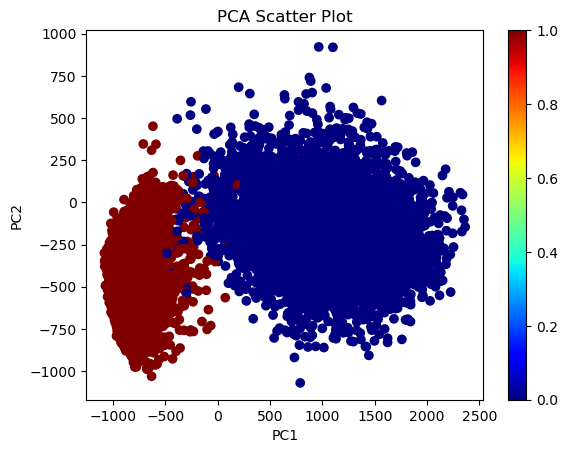

In [88]:
plot_digits({0, 1})

- It separates quite well 0 and 1
- It is more variety in the 0 than in the ones

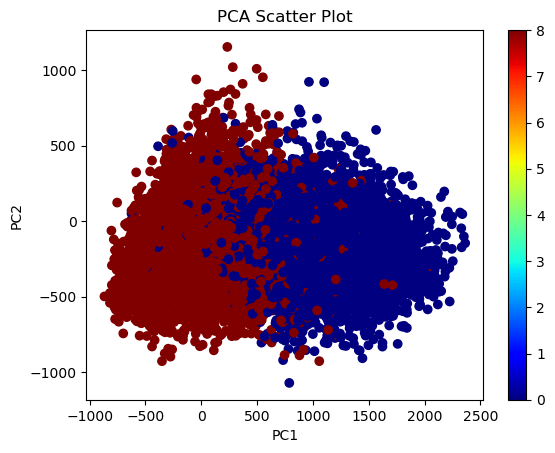

In [90]:
plot_digits({0, 8})

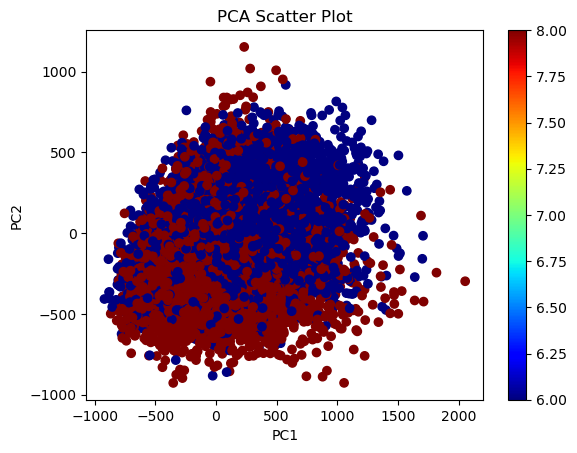

In [91]:
plot_digits({6, 8})

Not quite well separated.

If I add more components, I can get a more accurate representation, but I can no longer visualize it.

In [93]:
# Perform PCA
pca = PCA(n_components=10)  # Select the number of components you want to keep
principal_components = pca.fit_transform(data)

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(principal_components, columns=[f'PC{n}' for n in range(1, 11)])

In [95]:
total_variance = data.var().sum()
print("Total variance", total_variance)
print("Explained variance per PC:", pca.explained_variance_)
relative_var = pca.explained_variance_ / total_variance * 100
print("- relative:", relative_var)
print("- cumulative", np.cumsum(relative_var))

Total variance 3428502.574780269
Explained variance per PC: [332724.66744657 243283.93907029 211507.36705614 184776.38585982
 166926.83126766 147844.96164065 112178.19856006  98874.41866763
  94696.19452271  80809.44641808]
- relative: [9.70466436 7.09592406 6.16908876 5.38941949 4.86879702 4.31223131
 3.27192983 2.88389513 2.76202781 2.35698952]
- cumulative [ 9.70466436 16.80058842 22.96967718 28.35909667 33.22789369 37.540125
 40.81205484 43.69594996 46.45797777 48.81496729]


So, taking only 10 principal components, I am able to explain almost half of the total variance of the original database with 784 features.

Sumarizing:
- PCA allows to transform datasets from higher dimensions to lower dimensions, keeping the most important information (related to variance)
- It is a powerfull tool for visualization (and for other methods too!)